<a href="https://colab.research.google.com/github/SriramS22/convolutional-denoising-autoencoder/blob/main/DeepLearnig(Ex7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, utils, models
from tensorflow.keras.datasets import mnist

In [ ]:
(xtrain,_), (xtest,_) = mnist.load_data()
xtrain.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
xtrainS = xtrain.astype('float32') / 255.
xtestS = xtest.astype('float32') / 255.

xtrainS = np.reshape(xtrainS,(len(xtrainS),28,28,1))
xtestS = np.reshape(xtestS,(len(xtestS),28,28,1))

In [ ]:
nf = 0.5
xtrainN=xtrainS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtrainS.shape)
xtestN=xtestS+nf*np.random.normal(loc=0.0,scale=1.0,size=xtestS.shape)

In [ ]:
xtrainN = np.clip(xtrainN, 0., 1.)
xtestN = np.clip(xtestN, 0., 1.)

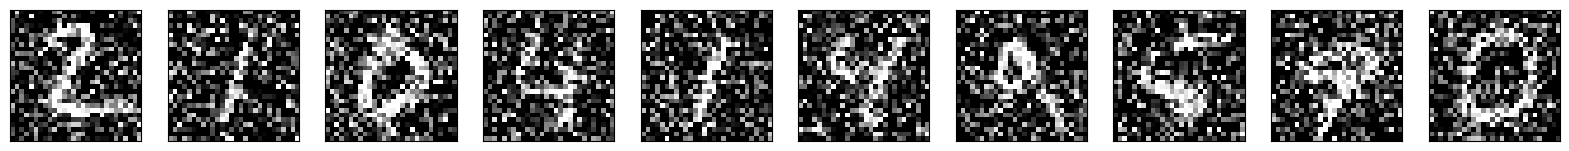

In [ ]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtestN[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
inp_img=keras.Input(shape=(28,28,1))

x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(inp_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoder=layers.MaxPooling2D((2,2),padding='same')(x)

x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(3,3),activation='relu')(x)
x=layers.UpSampling2D((2,2))(x)
decoder=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

model=keras.Model(inp_img,decoder)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
model.fit(xtrainN,xtrainS,epochs=50,batch_size=128,shuffle=True,validation_data=(xtestN,xtestS))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - loss: 0.1217 - val_loss: 0.1197
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 152ms/step - loss: 0.1211 - val_loss: 0.1195
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 144ms/step - loss: 0.1210 - val_loss: 0.1196
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - loss: 0.1207 - val_loss: 0.1200
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 146ms/step - loss: 0.1206 - val_loss: 0.1198
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - loss: 0.1203 - val_loss: 0.1193
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - loss: 0.1202 - val_loss: 0.1186
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - loss: 0.1201 - val_loss: 0.1188
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 144ms/step - loss: 0.1199 - val_loss: 0.1185
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - loss: 0.1201 - val_loss: 0.1188
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - loss: 0.1196 - val_loss: 0.1185
Epoch 12/50
469/469

In [ ]:
metrics=pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training Loss vs. Validation Loss\nSRIRAM S(212222240105)')

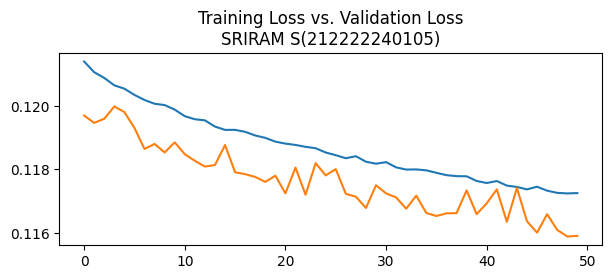

In [ ]:
plt.figure(figsize=(7,2.5))
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss\nSRIRAM S(212222240105)')

In [ ]:
decodeimg=model.predict(xtestN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


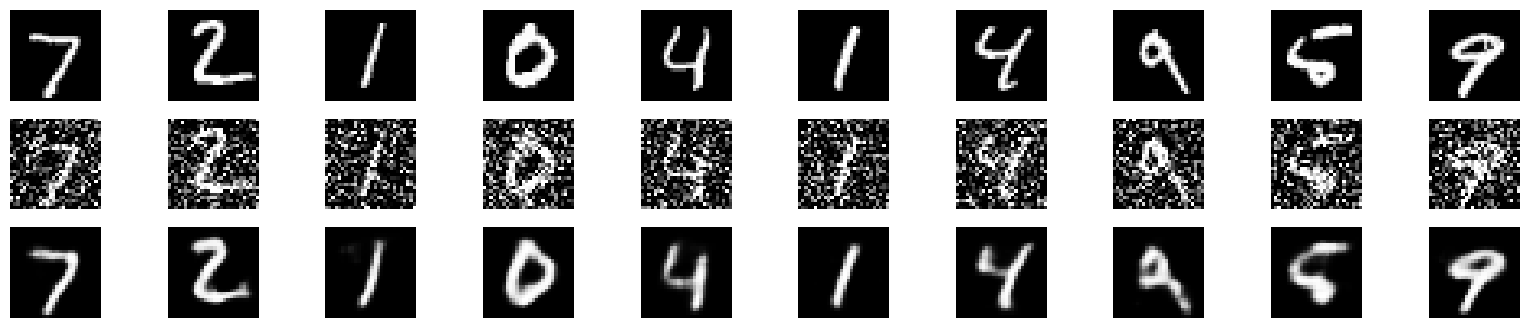

In [ ]:
  def display_images(xtestS, xtestN, decodeimg, n=10):
      plt.figure(figsize=(20, 4))
      for i in range(n):
          for j, img in enumerate([xtestS,xtestN,decodeimg]):
              ax = plt.subplot(3, n, i + 1 + j * n)
              plt.imshow(img[i].reshape(28, 28), cmap='gray')
              ax.axis('off')
      plt.show()
  display_images(xtestS, xtestN, decodeimg)